In [2]:
import numpy as np
import numpy.random as npr
from scipy.stats import norm

# Step 1

## 1

In [15]:
def bs_call_price(S, r, sigma, t, T, K):
    ttm = T - t
    if ttm < 0:
        return 0.0
    elif ttm == 0.0:
        return np.maximum(S - K, 0.0)

    vol = sigma * np.sqrt(ttm)

    d_plus = np.log(S / K) + (r - 0.5 * sigma**2) * ttm
    d_plus /= vol

    d_minus = d_plus - vol

    res = S * norm.cdf(d_plus)
    res -= K * np.exp(-r * ttm) * norm.cdf(d_minus)

    delta = norm.cdf(d_plus)
    vega = S * norm.pdf(d_plus) * np.sqrt(T)

    return res, delta, vega


def bs_put_price(S, r, sigma, t, T, K):
    ttm = T - t

    if ttm < 0:
        return 0.0
    elif ttm == 0.0:
        return np.maximum(K - S, 0.0)

    vol = sigma * np.sqrt(ttm)

    d_plus = np.log(S / K) + (r - 0.5 * sigma**2) * ttm
    d_plus /= vol

    d_minus = d_plus - vol

    res = K * np.exp(-r * ttm) * norm.cdf(-d_minus)
    res -= S * norm.cdf(-d_plus)

    delta = - norm.cdf(-d_plus)
    vega = S * norm.pdf(d_plus) * np.sqrt(T)

    return res, delta, vega

The code defines two functions, bs_call_price and bs_put_price, to calculate option prices using the Black-Scholes model. Given input parameters, they compute time to maturity (ttm), volatility (vol), d_plus, and d_minus. Using these, they determine option prices based on the model's formulas, involving cumulative distribution functions (CDF) and probability density functions (PDF) of the standard normal distribution. The functions handle call and put options differently and return option prices, relevant CDF/PDF values, and intermediaries.

In [16]:
bs_call, bs_call_delta, bs_call_vega = bs_call_price(100, .05, .2, 0, .25, 100)
bs_put, bs_put_delta, bs_put_vega = bs_put_price(100, .05, .2, 0, .25, 100)
print("BS Analytical Call Price: {}\nBS Analytical Put Price: {}\nBS Analytical Call Delta: {}\nBS Analytical Put Delta: {}\nBS Analytical Call Vega: {}\nBS Analytical Put Vega: {}".format(round(bs_call,2),round(bs_put,2),round(bs_call_delta,2),round(bs_put_delta,2), round(bs_call_vega,2),round(bs_put_vega,2)))

BS Analytical Call Price: 4.6
BS Analytical Put Price: 3.35
BS Analytical Call Delta: 0.53
BS Analytical Put Delta: -0.47
BS Analytical Call Vega: 19.89
BS Analytical Put Vega: 19.89


For call options:
When dealing with call options, a positive delta signifies that as the underlying asset's price rises, the option's price will also increase. This stems from the fact that call options grant the holder the right to purchase the underlying asset. However, a negative delta is not applicable for call options since their delta ranges from 0 to 1, reflecting the likelihood of them expiring in-the-money.

For put options:
For put options, a positive delta isn't relevant. Instead, a negative delta signifies that as the price of the underlying asset falls, the option's price will rise. This happens because put options give the holder the right to sell the underlying asset at a set price. Just like with call options, a negative delta for put options reflects a range from -1 to 0, indicating the likelihood of expiring in-the-money.



In [ ]:
bs_call_price_v25, bs_call_delta_v25, bs_call_vega_v25 = bs_call_price(100, .05, .25, 0, .25, 100)
bs_put_price_v25, bs_put_delta_v25, bs_put_vega_v25 = bs_put_price(100, .05, .25, 0, .25, 100)
print("BS Analytical Call Price: {}\nBS Analytical Put Price: {}\nBS Analytical Call Delta: {}\nBS Analytical Put Delta: {}\nBS Analytical Call Vega: {}\nBS Analytical Put Vega: {}".format(round(bs_call_price_v25,2),round(bs_put_price_v25,2),round(bs_call_delta_v25,2),round(bs_put_delta_v25,2), round(bs_call_vega_v25,2),round(bs_put_vega_v25,2)))

BS Analytical Call Price: 5.56
BS Analytical Put Price: 4.32
BS Analytical Call Delta: 0.51
BS Analytical Put Delta: -0.49
BS Analytical Call Vega: 19.93
BS Analytical Put Vega: 19.93


Volatility changes impact call and put options differently. An increase in volatility generally benefits both options, raising their premiums. However, this effect is more pronounced for options that are out-of-the-money (OTM), as they have higher potential for larger price swings. In contrast, in-the-money (ITM) options' premiums are less influenced by volatility changes due to their intrinsic value being dominant.

## 2

In [ ]:
def bs_call_mc(S, K, r, sigma, T, t, Ite):
    data = np.zeros((Ite, 2))
    z = np.random.normal(0, 1, [1, Ite])
    ST = S * np.exp((T - t) * (r - 0.5 * sigma**2) + sigma * np.sqrt(T - t) * z)
    data[:, 1] = ST - K

    average = np.sum(np.amax(data, axis=1)) / float(Ite)

    return np.exp(-r * (T - t)) * average

def bs_put_mc(S, K, r, sigma, T, t, Ite):
    data = np.zeros((Ite, 2))
    z = np.random.normal(0, 1, [1, Ite])
    ST = S * np.exp((T - t) * (r - 0.5 * sigma**2) + sigma * np.sqrt(T - t) * z)
    data[:, 1] = K - ST

    average = np.sum(np.amax(data, axis=1)) / float(Ite)

    return np.exp(-r * (T - t)) * average

In [ ]:
np.random.seed(2)
print("Monte Carlo Call Price:", round(bs_call_mc(100, 100, 0.05, 0.2, 3/12, 0, 100000),2))

Monte Carlo Call Price: 4.6


In [ ]:
np.random.seed(2)
print("Monte Carlo Put Price:", round(bs_put_mc(100, 100, 0.05, 0.2, 3/12, 0, 100000),2))

Monte Carlo Put Price: 3.39


For the Monte-Carlo simulation of the call and put option prices, we decided to use 100000 simulations as it was the approach used in jupyter notebook lesson notes and also because industry practices advice to use at least 10000 simulations to get an option price which is as close as possible to the price obtained in previous point of this Step 1.

In [ ]:
def delta_call_mc(S, K, r, sigma, T, num_simulations, delta_S):

    np.random.seed(2)
    original_price = bs_call_mc(S, K, r, sigma, T, 0, num_simulations)
    new_price = bs_call_mc(S + delta_S, K, r, sigma, T, 0, num_simulations)
    delta = (new_price - original_price) / delta_S
    return delta

In [ ]:
print("Delta of the Call Option:", round(delta_call_mc(100, 100, 0.05, 0.2, 3/12, 100000, 0.01),2))

Delta of the Call Option: 0.15


In [ ]:
def delta_put_mc(S, K, r, sigma, T, num_simulations, delta_S):

    np.random.seed(2)
    original_price = bs_put_mc(S, K, r, sigma, T, 0, num_simulations)
    new_price = bs_put_mc(S + delta_S, K, r, sigma, T, 0, num_simulations)
    delta = (new_price - original_price) / delta_S
    return delta

In [ ]:
print("Delta of the Put Option:", round(delta_put_mc(100, 100, 0.05, 0.2, 3/12, 100000, 0.01),2))

Delta of the Put Option: -5.82


As expected, the delta of the call option is a positive value, while the delta for the put option is a negative value. While the delta for the call under Monte-Carlo method (0.15) is not so far from the delta for the call calculated under Black-Scholes model (0.53), the delta for the put option under Monte-Carlo (-5.82) is significantly far from the delta for the put under Black-Scholes (-0.47) and this is probably due to the same reasons observed for Put-Call parity condition below. Also, when the volatility increases then the delta of a put option decreases and given that underlying asset price change and volatility have a directly proportional effect on the option price, this is why we observed such a difference in the delta of the put option price after shocking the underlying asset price.

In [ ]:
# Volatility parameter shocked
np.random.seed(2)
print("Monte Carlo Call Price:", round(bs_call_mc(100, 100, 0.05, 0.25, 3/12, 0, 100000),2))

Monte Carlo Call Price: 5.59


In [ ]:
np.random.seed(2)
print("Monte Carlo Put Price:", round(bs_put_mc(100, 100, 0.05, 0.25, 3/12, 0, 100000),2))

Monte Carlo Put Price: 4.38


Theoretically, an increase in volatility should produce an increase in the price of the option, both for calls and puts. In fact, shocking the volatility from 0.20 to 0.25, we observed an increase in the call option price (from 4.6 to 5.59) and an increase in the put option price as well (from 3.39 to 4.38).

## 3

### a

In [ ]:
# Put-Call parity under Black-Scholes method
round(4.59 + 100 * np.exp(-0.05 * (3/12)), 2) == round(100 + 3.35, 2)

True

Put-Call Parity condition is satisfied in the case of Black-Scholes model.

In [ ]:
# Put-Call parity under Monte-Carlo method
round(4.6 + 100 * np.exp(-0.05 * (3/12)), 2) == round(100 + 3.39, 2)

Put-Call Parity condition is not satisfied in the case of Monte-Carlo method but this is probably due to the probabilistic nature of this model and also due to the fact that this method introduces some additional randomness.

### b

Prices obtained via Monte-Carlo methods (4.6 for the call and 3.39 for the put) are reasonably close to the prices obtained via Black-Scholes method (4.59 for the call and 3.35 for the put). This is probably due to the fact that we considered a significantly large number of iterations, which allowed us to get really close to the price calculated by Black-Scholes model.

# Step 2

## 4

In [5]:
def american_option_price_gbm(S0, K, T, r, sigma, n_steps, option_type='call', n_paths=100000):
    dt = T / n_steps
    paths = np.zeros((n_paths, n_steps+1))
    paths[:, 0] = S0

    for i in range(n_steps):
        paths[:, i+1] = paths[:, i] * np.exp((r - 0.5 * sigma**2) * dt + sigma * np.sqrt(dt) * npr.standard_normal(n_paths))

    if option_type == 'call':
        payoff = np.maximum(paths - K, 0)
    else:
        payoff = np.maximum(K - paths, 0)

    option_price = np.zeros(n_paths)
    option_value = payoff[:, -1]

    for i in range(n_steps-1, -1, -1):
        discount_factor = np.exp(-r * dt)
        option_value = np.maximum(payoff[:, i], option_value * discount_factor)


    option_price = np.mean(option_value)
    return option_price


# Compute American call option price
american_call_price = american_option_price_gbm(100, 100, .25, .05, .2, 1000, option_type='call')
print(f"American call option price: {american_call_price:.2f}")

American call option price: 8.67


The code is for estimating the price of an American option using the Geometric Brownian Motion model and Monte Carlo simulation. It models possible asset price paths, calculates payoffs at expiration, evaluates option values through backward steps, averages results across simulations, and returns the estimated option price.

In [13]:
delta = (american_option_price_gbm(100.1, 100, .25, .05, .2, 1000, option_type='call') - american_call_price) / (.1)
round(delta,2)

0.9

The delta of a call option is positive because call options increase in value as the underlying asset's price rises. This is due to the profit potential from upward price movements, leverage, positive correlation between option and asset prices, and the option's ability to finish in-the-money. This positive delta also aids in hedging and managing portfolios.

In [8]:
american_call_price_v20 = american_option_price_gbm(100, 100, .25, .05, .25, 1000, option_type='call')
print(f"American call option price (sigma 0.25): {american_call_price_v20:.2f}")

American call option price (sigma 0.25): 10.69


Higher volatility boosts premiums for both call and put options. OTM options gain more as they thrive on significant price swings, while ITM options are less influenced due to existing intrinsic value.

## 5

In [ ]:
S0 = 100
K = 100
r = 0.05
T = 3/12
sigma = 0.2
Ite = 100000
N = int(T * 252)  # 252 trading days per year, we choose the number of steps in this way so that we have daily time steps

# Generate random paths
dt = T/N
rand = np.random.normal(0, 1, (N, Ite)) # allocating memory for random normal shocks
paths = np.zeros((N + 1, Ite)) # allocating memory for stock price behavior
paths[0, :] = S0
for t in range(1, N + 1):
    paths[t, :] = paths[t - 1, :] * np.exp((r - 0.5 * sigma**2) * dt + sigma * np.sqrt(dt) * rand[t - 1, :])

# Calculate option payoffs
payoffs = np.maximum(K - paths, 0)

# Backward induction for option price and delta
option_values = np.zeros_like(payoffs)
option_values[-1, :] = payoffs[-1, :]
for t in range(N - 1, 0, -1):
    intrinsic_values = np.maximum(K - paths[t, :], 0)
    early_exercise_values = np.maximum(intrinsic_values, option_values[t + 1, :] * np.exp(-r * dt))
    option_values[t, :] = early_exercise_values

# Estimate option price and delta
option_price = np.mean(option_values[1, :] * np.exp(-r * dt))
delta_S = 1.0
delta = (option_values[1, 1] - option_values[1, 0]) / (delta_S * S0)

print("Estimated American Put Option Price:", round(option_price,2))
print("Estimated Delta:", delta)

Estimated American Put Option Price: 6.45
Estimated Delta: -0.13036226086254754


The result for Delta looks reasonable (-0.13), given that it is a negative value (it means that we will have to short-sell that quantity of shares of the underlying asset at the beginning of the strategy). Also, the price of the American Put option (6.45) looks reasonable if we compare it with the ones for European put option calculated via Black-Scholes Model (3.35) and Monte-Carlo (3.39), because the price of an American option should always be higher than or equal to the price of the European corresponding option, due to the early exercise option.

In [ ]:
# Volatility parameter shocked
np.random.seed(2)
S0 = 100
K = 100
r = 0.05
T = 3/12
sigma = 0.25
Ite = 100000
N = int(T * 252)  # 252 trading days per year, we choose the number of steps in this way so that we have daily time steps

# Generate random paths
dt = T/N
rand = np.random.normal(0, 1, (N, Ite)) # allocating memory for random normal shocks
paths = np.zeros((N + 1, Ite)) # allocating memory for stock price behavior
paths[0, :] = S0
for t in range(1, N + 1):
    paths[t, :] = paths[t - 1, :] * np.exp((r - 0.5 * sigma**2) * dt + sigma * np.sqrt(dt) * rand[t - 1, :])

# Calculate option payoffs
payoffs = np.maximum(K - paths, 0)

# Backward induction for option price and delta
option_values = np.zeros_like(payoffs)
option_values[-1, :] = payoffs[-1, :]
for t in range(N - 1, 0, -1):
    intrinsic_values = np.maximum(K - paths[t, :], 0)
    early_exercise_values = np.maximum(intrinsic_values, option_values[t + 1, :] * np.exp(-r * dt))
    option_values[t, :] = early_exercise_values

# Estimate option price and delta
option_price = np.mean(option_values[1, :] * np.exp(-r * dt))

print("Estimated American Put Option Price:", round(option_price,2))

Estimated American Put Option Price: 8.17


As expected and as in the previous cases with european call and put options, if we increase the volatility we would expect to see an increase in the option in price: in fact, by increasing the volatility from 0.20 to 0.25, the american put option price increased from 6.45 to 8.17.

## 6

### a

### CALL

In [ ]:
np.random.seed(2)
option_price, deltas = american_option_price_and_delta_gbm(100, 90, 3/12, 0.05, 0.2, int((3/12) * 252), 'call', 100000)
print("Option Price:", round(option_price,2))

Option Price: 18.0


In [ ]:
np.random.seed(2)
option_price, deltas = american_option_price_and_delta_gbm(100, 95, 3/12, 0.05, 0.2, int((3/12) * 252), 'call', 100000)
print("Option Price:", round(option_price,2))

Option Price: 13.04


In [ ]:
np.random.seed(2)
option_price, deltas = american_option_price_and_delta_gbm(100, 100, 3/12, 0.05, 0.2, int((3/12) * 252), 'call', 100000)
print("Option Price:", round(option_price,2))

Option Price: 8.07


In [ ]:
np.random.seed(2)
option_price, deltas = american_option_price_and_delta_gbm(100, 105, 3/12, 0.05, 0.2, int((3/12) * 252), 'call', 100000)
print("Option Price:", round(option_price,2))

Option Price: 4.26


In [ ]:
np.random.seed(2)
option_price, deltas = american_option_price_and_delta_gbm(100, 110, 3/12, 0.05, 0.2, int((3/12) * 252), 'call', 100000)
print("Option Price:", round(option_price,2))

Option Price: 2.0


If the strike price increases, the call option will go out of the money and the call option price should be lower, in order to reward the investor for a more difficult situation than when the option is in the money. In fact, calculating the American call option prices for different strike prices we observed that the higher the strike price the lower the american call option price, so it makes sense.

### PUT

In [ ]:
def am_put_price(S0, K, r, sigma, T, Ite, N):
  # Generate random paths
  dt = T/N
  rand = np.random.normal(0, 1, (N, Ite)) # allocating memory for random normal shocks
  paths = np.zeros((N + 1, Ite)) # allocating memory for stock price behavior
  paths[0, :] = S0
  for t in range(1, N + 1):
    paths[t, :] = paths[t - 1, :] * np.exp((r - 0.5 * sigma**2) * dt + sigma * np.sqrt(dt) * rand[t - 1, :])

  # Calculate option payoffs
  payoffs = np.maximum(K - paths, 0)

  # Backward induction for option price and delta
  option_values = np.zeros_like(payoffs)
  option_values[-1, :] = payoffs[-1, :]
  for t in range(N - 1, 0, -1):
    intrinsic_values = np.maximum(K - paths[t, :], 0)
    early_exercise_values = np.maximum(intrinsic_values, option_values[t + 1, :] * np.exp(-r * dt))
    option_values[t, :] = early_exercise_values

  # Estimate option price and delta
  option_price = np.mean(option_values[1, :] * np.exp(-r * dt))

  print("Estimated American Put Option Price:", round(option_price,2))

In [ ]:
np.random.seed(2)
am_put_price(100, 90, 0.05, 0.2, 3/12, 100000, int(T * 252))

Estimated American Put Option Price: 1.07


In [ ]:
np.random.seed(2)
am_put_price(100, 95, 0.05, 0.2, 3/12, 100000, int(T * 252))

Estimated American Put Option Price: 3.02


In [ ]:
np.random.seed(2)
am_put_price(100, 100, 0.05, 0.2, 3/12, 100000, int(T * 252))

Estimated American Put Option Price: 6.79


In [ ]:
np.random.seed(2)
am_put_price(100, 105, 0.05, 0.2, 3/12, 100000, int(T * 252))

Estimated American Put Option Price: 11.74


In [ ]:
np.random.seed(2)
am_put_price(100, 110, 0.05, 0.2, 3/12, 100000, int(T * 252))

Estimated American Put Option Price: 16.71


On the contrary, for put options we would expect the following: if the strike price increases then the put option goes in the money, when the underlying asset value is lower than the strike price, and this would lead to a higher price for the put option. In fact, calculating american put option prices for different strike prices we observed that the higher the strike price the higher the put option price and so it makes sense.

### b

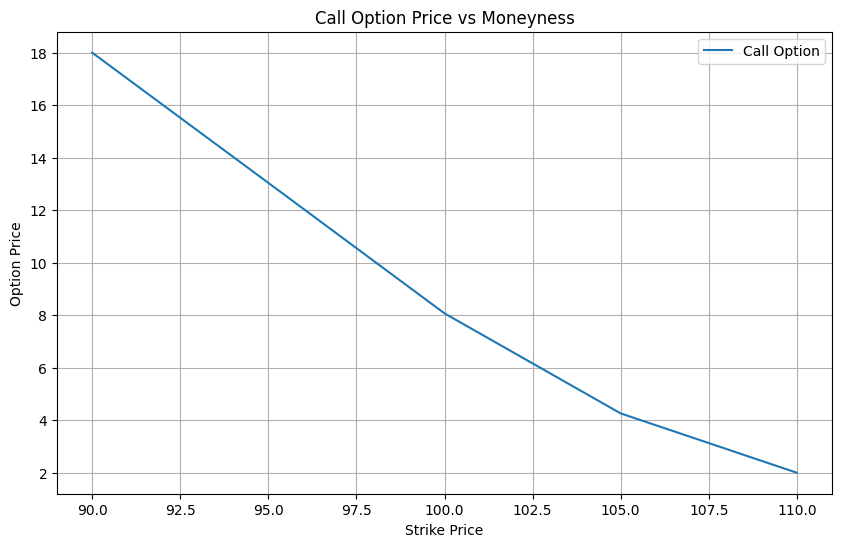

In [ ]:
import matplotlib.pyplot as plt

# Calls
K = [90, 95, 100, 105, 110]
call_prices = [18.0, 13.04, 8.07, 4.26, 2.0]

# Plot
plt.figure(figsize=(10, 6))
plt.plot(K, call_prices, label='Call Option')
plt.xlabel('Strike Price')
plt.ylabel('Option Price')
plt.title('Call Option Price vs Moneyness')
plt.legend()
plt.grid(True)
plt.show()


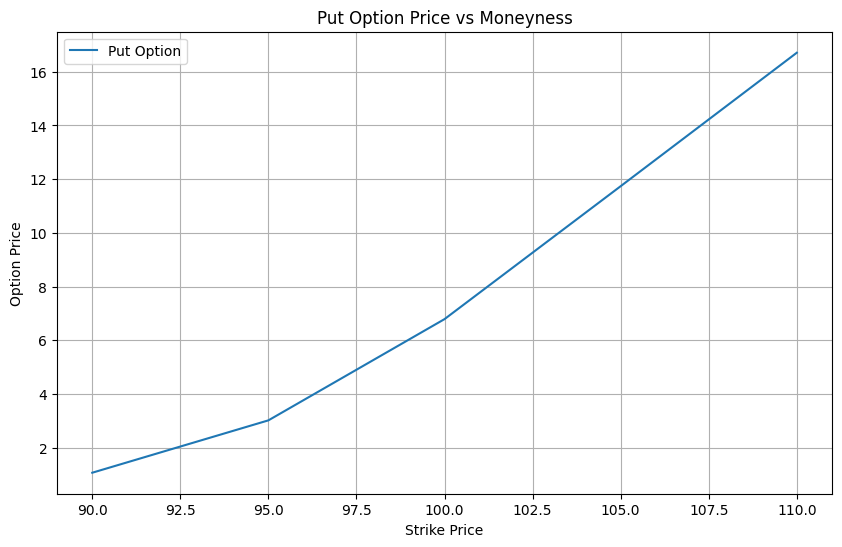

In [ ]:
# Puts
K = [90, 95, 100, 105, 110]
put_prices = [1.07, 3.02, 6.79, 11.74, 16.71]

# Plot
plt.figure(figsize=(10, 6))
plt.plot(K, put_prices, label='Put Option')
plt.xlabel('Strike Price')
plt.ylabel('Option Price')
plt.title('Put Option Price vs Moneyness')
plt.legend()
plt.grid(True)
plt.show()


#Step 3

## 7.a

In [ ]:
bs_call, bs_call_delta, vega1 = bs_call_price(100, .05, .2, 0, .25, 110)
bs_put, bs_put_delta, vega2 = bs_put_price(100, .05, .2, 0, .25, 95)
print("BS Analytical Call Price: {}\nBS Analytical Put Price: {}\nBS Analytical Call Delta: {}\nBS Analytical Put Delta: {}\nBS Analytical Call Vega: {}\nBS Analytical Put Vega: {}".format(round(bs_call,2),round(bs_put,2),round(bs_call_delta,2),round(bs_put_delta,2), round(vega1,2),round(vega2,2)))

BS Analytical Call Price: 1.18
BS Analytical Put Price: 1.52
BS Analytical Call Delta: 0.19
BS Analytical Put Delta: -0.28
BS Analytical Call Vega: 13.57
BS Analytical Put Vega: 16.78


Since we are shorting the put we will change the sign of the delta to "0.28".

## 7.b

Strangle

When the stock price is between the strike prices of the strangle the deltas offset each other. The portfolio's overall delta is generally the sum of the individual options' deltas. Delta measures the sensitivity of an option's price to changes in the underlying asset's price. Since the delta of an option ranges from -1 to 1 for a single option, the sum of the deltas of multiple options in a portfolio can give you an indication of how the overall portfolio value might change with small changes in the underlying asset's price.

To delta hedge, we will sell the underlying as the price increase and buy it as it decreases.

Keep in mind that this assumes the options in the portfolio are not highly correlated and that the prices of the underlying assets are changing by small amounts. If the options in the portfolio have significantly different expiration dates, strikes, or other factors, the relationship might be more complex. Additionally, if the portfolio includes other types of securities or positions, the calculation of the portfolio's overall delta could become more intricate.

## 7.c

If we buy a call and sell a put, where the call strike is bigger than the put strike, our delta will always be positive as the sum of two positive numbers is always positive. We would need to compute our delta and adjust our stock position, mainly near the strikes.

## 8

In [ ]:
def UAO_price(S0, K, r, sigma, T, Ite, N, barrier):
  dt = T / N
  paths = np.zeros((N + 1, Ite))
  paths[0] = S0

  for i in range(1, N + 1):
    z = np.random.standard_normal(Ite)
    paths[i] = paths[i - 1] * np.exp((r - 0.5 * sigma**2) * dt + sigma * np.sqrt(dt) * z)

  payoffs = np.maximum(paths[-1] - K, 0)
  breached = np.any(paths > barrier, axis=0)
  payoffs[breached] = 0

  discount_factor = np.exp(-r * T)
  option_price = discount_factor * np.mean(payoffs)

  print("Estimated UAO Barrier Option Price:", round(option_price,2))

In [ ]:
np.random.seed(2)
UAO_price(120, 120, 0.06, 0.3, 8/12, 100000, int((8/12) * 252), 141)

Estimated UAO Barrier Option Price: 0.71


## 9

### a

In [ ]:
def UAI_price(S0, K, r, sigma, T, Ite, N, barrier):
  dt = T / N
  paths = np.zeros((N + 1, Ite))
  paths[0] = S0

  for i in range(1, N + 1):
    z = np.random.standard_normal(Ite)
    paths[i] = paths[i - 1] * np.exp((r - 0.5 * sigma**2) * dt + sigma * np.sqrt(dt) * z)

  payoffs = np.maximum(paths[-1] - K, 0)
  breached = np.all(paths > barrier, axis=0)
  payoffs[breached] = 0

  discount_factor = np.exp(-r * T)
  option_price = discount_factor * np.mean(payoffs)

  print("Estimated UAI Barrier Option Price:", round(option_price,2))

In [ ]:
np.random.seed(2)
UAI_price(120, 120, 0.06, 0.3, 8/12, 100000, int((8/12) * 252), 141)

Estimated UAI Barrier Option Price: 13.97


### b

In [ ]:
# Vanilla European-style Call option
np.random.seed(2)
print("Monte Carlo Call Price:", round(bs_call_mc(120, 120, 0.06, 0.3, 8/12, 0, 100000),2))

Monte Carlo Call Price: 13.95


We observed that UAI barrier option price (13.97) is significantly close to the vanilla European Call option price (13.95) and far from the UAO barrier option price. This is due to the behavior of the two barrier options: the UAI barrier option activates only when the barrier is crossed, while the UAO barrier option stops to exist if the barrier is crossed. This means that a UAI barrier option basically behaves as a European Call option, while the UAO barrier option is something completely different which has the risk of disappearing (this explains the low price observed for UAO, which is equal to 0.71).